In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Google Sheets CSV export URL
BASE_URL = "https://docs.google.com/spreadsheets/d/"
SHEET_ID = "1NrShsm4wnAcfk9eIRa7sGGsOLPkNOaSq"
EXPORT_FORMAT = "/gviz/tq?tqx=out:csv"

CSV_URL = BASE_URL + SHEET_ID + EXPORT_FORMAT

# Read the CSV into a pandas DataFrame
df = pd.read_csv(CSV_URL)

# Drop empty columns
df = df.dropna(axis=1, how='all')

# Strip column names of extra spaces (if any)
df.columns = df.columns.str.strip()

# Display the first few rows
df.head()


,S.N.,Date,Reference/From where did they come to know about us?,comments
0,1,25-April-2024,Whatsapp,Want Sadalwood plants
1,2,26-April-2024,Instagram,Interested to Agroforestry but Not decided fruits
2,3,26-April-2024,Peer to Peer,Interested to Agroforestry but Not decided fruits
3,4,27-April-2024,Poster/Flyer,Interested to Agroforestry but Not decided fruits
4,5,27-April-2024,Whatsapp,Mango And Sitaphal


In [60]:
# Rename columns for easier access
df.columns = ['S.N.', 'Date', 'Source', 'Comments']

## Most Common Channels for Learning About F4F

In [62]:
# Define similarity groups

category_mapping = {
    'Whatsapp': 'WhatsApp',
    'Instagram': 'Instagram',
    'Insta': 'Instagram', 
    'Peer to Peer': 'Peer to Peer',
    'Poster/Flyer': 'Flyer',
    'Facebook': 'Facebook',
    'Fb': 'Facebook',  # Merge "Fb" with "Facebook"
    'Stall /program/Function': 'Event/Function',
    'F4F_Team': 'F4F_Team',
    'Youtube/Google': 'YouTube/Google',
    'Youtube': 'YouTube/Google',  
    'other': 'Other'
}


df["References"] = df["Source"].replace(category_mapping)

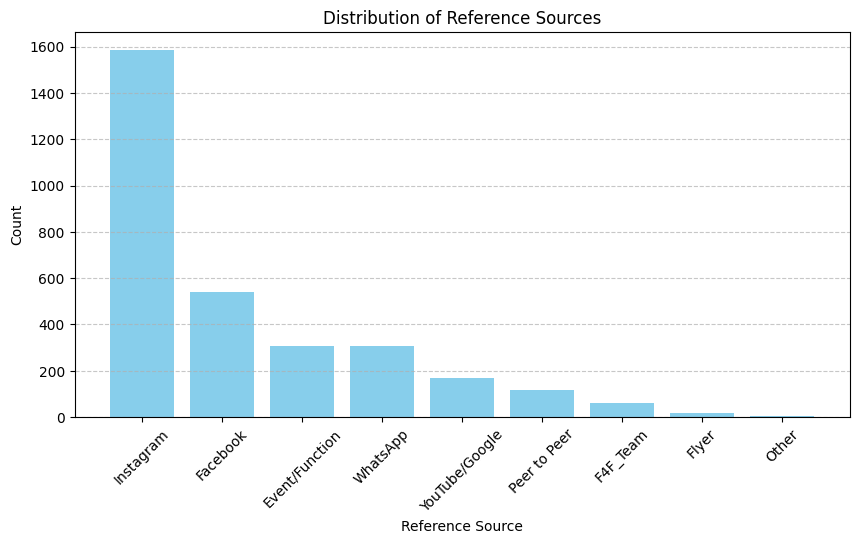

References
Instagram         1583
Facebook           540
Event/Function     309
WhatsApp           308
YouTube/Google     170
Peer to Peer       117
F4F_Team            63
Flyer               18
Other                6
Name: count, dtype: int64


In [63]:
# Plot the data
group_count = df["References"].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(group_count.index, group_count.values, color='skyblue')

# Customize the plot
plt.xlabel('Reference Source')
plt.ylabel('Count')
plt.title('Distribution of Reference Sources')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
print(group_count)

## Months with Highest Engagement

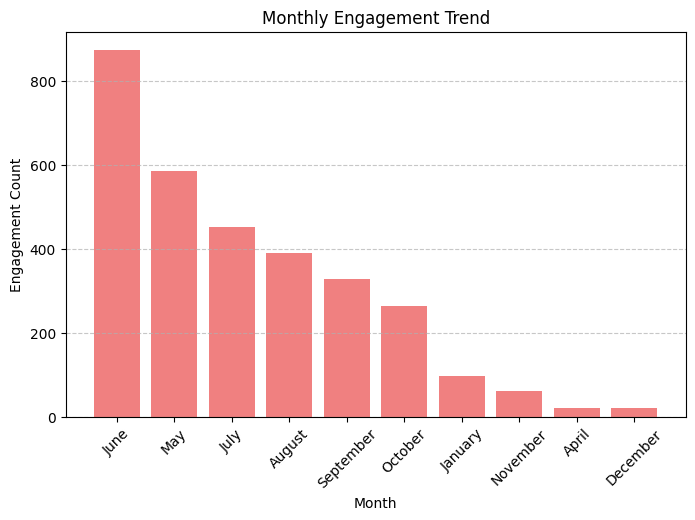

Month
June         873
May          585
July         451
August       389
September    327
October      264
January       96
November      60
April         21
December      21
Name: count, dtype: int64


In [64]:
# Convert the 'Date' column to datetime format (handling mixed formats)
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Extract month and create a new column
df['Month'] = df['Date'].dt.strftime('%B')  # Extract full month name

# Count occurrences per month
monthly_engagement = df['Month'].value_counts()

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(monthly_engagement.index, monthly_engagement.values, color='lightcoral')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Engagement Count')
plt.title('Monthly Engagement Trend')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Display month-wise engagement counts
print(monthly_engagement)


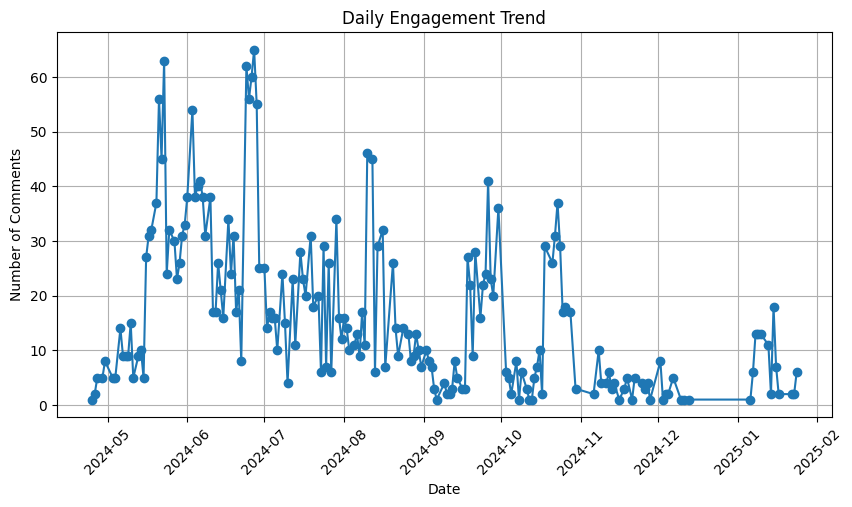

In [65]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)


daily_engagement = df.groupby(df['Date'].dt.date)['Comments'].count()

# Plot time-series trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(daily_engagement.index, daily_engagement.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.title("Daily Engagement Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Most Inquired Crop Species

In [66]:
import pandas as pd
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')



def extract_common_words(comments):
    stop_words = set(stopwords.words('english'))
    words = []
    for comment in comments.dropna():
        tokens = comment.lower().split()  # Use split() instead of word_tokenize()
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        words.extend(filtered_tokens)
    return Counter(words).most_common(10)

common_words = extract_common_words(df['Comments'])
print("Most Common Words:", common_words)


Most Common Words: [('interested', 845), ('farmer', 828), ('mango', 439), ('f4f', 159), ('called', 139), ('plantation', 128), ('want', 118), ('information', 118), ('get', 106), ('sitaphal', 105)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
from collections import Counter

def most_interested_trees(comments):
    # Define tree species of interest
    tree_species = ['Mango',"Orange", 'Sitaphal', 'Lemon', 'Guava', 'Shevga','Bamboo' 'Jambul', 'Pomegranate', 'Coconut', "Mosambi","Chiku"]

    # Convert comments to lowercase and count occurrences
    tree_counts = {tree: comments.str.contains(tree, case=False, na=False).sum() for tree in tree_species}

    # Sort by highest count
    sorted_trees = dict(sorted(tree_counts.items(), key=lambda item: item[1], reverse=True))

    return sorted_trees

# Call the function and print results
tree_interest = most_interested_trees(df['Comments'])
print("Most Interested Tree Species:", tree_interest)


Most Interested Tree Species: {'Mango': np.int64(849), 'Sitaphal': np.int64(287), 'Guava': np.int64(178), 'Lemon': np.int64(144), 'Mosambi': np.int64(110), 'Orange': np.int64(86), 'Pomegranate': np.int64(36), 'Chiku': np.int64(32), 'Shevga': np.int64(21), 'Coconut': np.int64(3), 'BambooJambul': np.int64(0)}


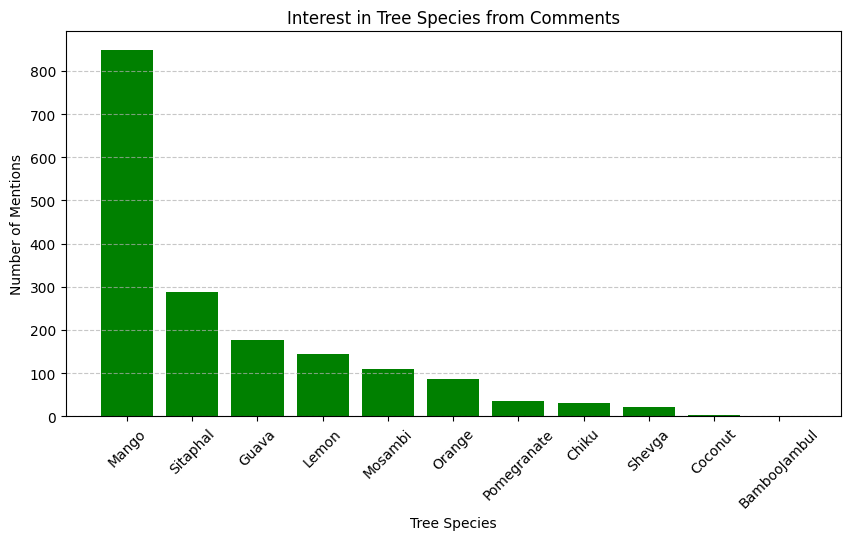

{'Mango': np.int64(849), 'Sitaphal': np.int64(287), 'Guava': np.int64(178), 'Lemon': np.int64(144), 'Mosambi': np.int64(110), 'Orange': np.int64(86), 'Pomegranate': np.int64(36), 'Chiku': np.int64(32), 'Shevga': np.int64(21), 'Coconut': np.int64(3), 'BambooJambul': np.int64(0)}


In [ ]:


def plot_tree_interest(tree_counts):
    plt.figure(figsize=(10, 5))
    plt.bar(tree_counts.keys(), tree_counts.values(), color='green')

    plt.xlabel("Tree Species")
    plt.ylabel("Number of Mentions")
    plt.title("Interest in Tree Species from Comments")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

# Get tree interest data
tree_interest = most_interested_trees(df['Comments'])

# Plot the data
plot_tree_interest(tree_interest)
print(tree_interest)


## Sentiment Analysis of Comments

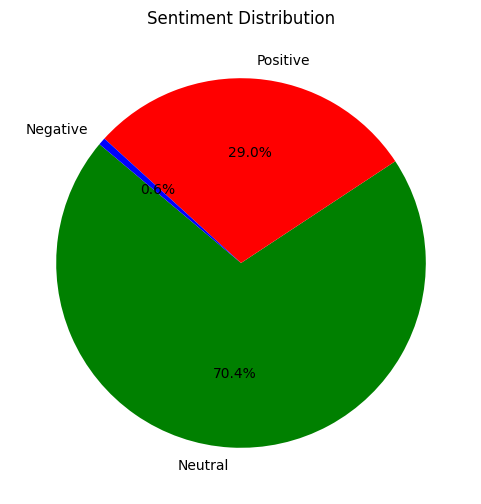

In [53]:
from textblob import TextBlob
import pandas as pd




# Function to analyze sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['Sentiment'] = df['Comments'].apply(get_sentiment)

# Count sentiment occurrences
sentiment_counts = df["Sentiment"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
colors = ["green", "red", "blue"]
sentiment_counts.plot.pie(autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide the y-label
plt.show()